In [9]:
### Taken from HW1, regular expressions adapted to use with Windows

import re
import matplotlib

matplotlib.use('Agg') # This is needed to save images 
import matplotlib.pyplot as plt
%matplotlib inline

delimiters = " ", ":", "\t"
regexPattern = '|'.join(map(re.escape, delimiters))

train_losses = []
val_losses = []
val_accs = []

# Code for unique filenames
########################################
i = 3

model_name = "squeezenet"
filename = str(i) + "_" + model_name + ".log"

lr = 1e-3
epochs = 20
batch_size = 128
lr_step = 5
#weight_decay = 1e-5

temp_name = str(i) + '_' + model_name + \
    '_ep_' + str(epochs) + \
    '_lr_' + str(lr) + \
    '_lrstep_' + str(lr_step) + \
    '_batch_' + str(batch_size) #+ \
    #'_weight_decay' + str(weight_decay)
########################################

with open(filename, 'r', newline='') as f:
    for line in f:
        ss = re.split(regexPattern, line)
        if len(ss) == 18:
            # ss[9] ss[13] ss[17]
            tr = float(ss[9].replace('\x00', ''))
            vl = float(ss[13].replace('\x00', ''))
            va = float(ss[17].replace('\x00', ''))
            #print(tr, vl, va)
            train_losses.append(tr)
            val_losses.append(vl)
            val_accs.append(va)
            
            #print(line)
            
len(train_losses)

1640

3_squeezenet_ep_20_lr_0.001_lrstep_5_batch_128


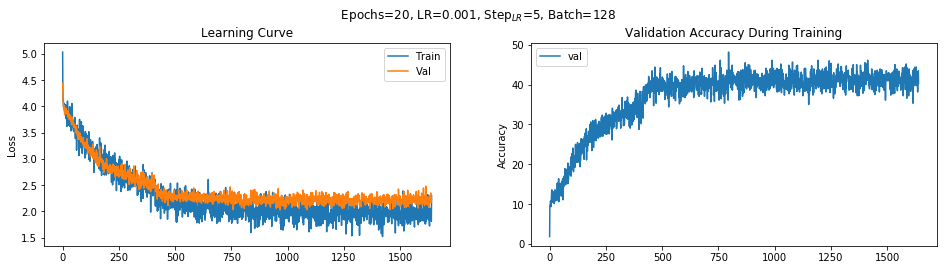

In [10]:
print(temp_name)

fig=plt.figure(figsize=(16, 4), facecolor='w', edgecolor='k')

fig.suptitle( " Epochs=" + str(epochs) \
          + ", LR=" + str(lr) \
          + ", Step$_{LR}$=" + str(lr_step) \
          + ", Batch=" + str(batch_size) )#\
          #+ ", R=" + str(weight_decay))

ax = plt.subplot(1, 2, 1)
ax.title.set_text("Learning Curve")
ax.plot(train_losses, label="Train")
ax.plot(val_losses, label="Val")
ax.set_ylabel("Loss")
ax.legend()

ax.set_aspect(1.0 / ax.get_data_ratio() * 0.5)

ax = plt.subplot(1, 2, 2)
ax.title.set_text("Validation Accuracy During Training")
ax.set_ylabel("Accuracy")
ax.plot(val_accs, label='val')
ax.legend()

ax.set_aspect(1.0 / ax.get_data_ratio() * 0.5)

fig.savefig(str(i) + '_' + model_name + ".png")

In [ ]:
# 1 (Old) python -u train.py --model squeezenet --batch-size 128 --lr-step-size 4 
# ~38%

# 2 (Old) python -u train.py --model squeezenet --batch-size 128 --lr-step-size 4 --weight-decay 1e-5 
# ~34% at final (with regularization)

# 3 (Old) ython -u train.py --model squeezenet --batch-size 128 --lr-step-size 5 --epochs 20 
# ~41% at final (Ubuntu)

################################################################################
################################################################################

# 1 python -u train.py --model squeezenet --lr 1e-3 --batch-size 128 --lr-step-size 10 --epochs 10
# ~40%, Best ~42%

# 2 python -u train.py --model squeezenet --lr 1e-3 --batch-size 128 --lr-step-size 10 --weight-decay 1e-5 --epochs 10
# ~38%, Best ~40% 

# 4 python -u train.py --model squeezenet --batch-size 128 --lr-step-size 10 --epochs 40 
# ~43% at final

################################################################################
################################################################################
# Learning rate of 1e-2 doesn't work well, stays at 10%

# python -u train.py --model squeezenet --lr 1e-2 --weight-decay 1e-5 --batch-size 128 --lr-step-size 4 | Tee-Object -file log_squeezenet.txt  
10%
